In [33]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport        #pandas-profiling is outdated so change to ydata 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import load_dataset # this method will help us to #download the Titanic dataset
plt.style.use('ggplot')

np.random.seed(42)

In [ ]:
data=pd.read_csv(r"voice.csv",encoding='UTF-8')

In [35]:
# x=ProfileReport(data)
# x

In [36]:
data

,gender,speaker,meanfun,minfun,maxfun,median,Q1,Q3,R,IQR
0,male,mohammad,0.229413,6.725577e-07,4.615198,0.070621,0.035548,0.129829,4.615198,0.094281
1,male,mohammad,0.351253,3.948986e-06,4.256857,0.114822,0.064798,0.251820,4.256853,0.187022
2,male,mohammad,0.295976,2.610344e-05,3.489215,0.121151,0.055800,0.261065,3.489189,0.205266
3,male,mohammad,0.321846,4.651460e-05,6.120218,0.120753,0.077109,0.236191,6.120171,0.159082
4,male,mohammad,0.367494,7.217474e-05,5.462997,0.104192,0.053586,0.245129,5.462924,0.191542
...,...,...,...,...,...,...,...,...,...,...
173,male,Hussin,0.368721,2.381486e-04,6.205337,0.170914,0.056980,0.317699,6.205100,0.260718
174,male,Hussin,0.308420,3.182365e-05,6.794166,0.139969,0.059635,0.253293,6.794134,0.193659
175,male,Hussin,0.470928,6.509030e-05,5.795857,0.203309,0.076787,0.392657,5.795792,0.315870
176,male,Hussin,0.507957,3.088614e-05,6.329544,0.280759,0.131377,0.582535,6.329513,0.451159


In [37]:
data.isnull().sum()

gender     0
speaker    0
meanfun    0
minfun     0
maxfun     0
median     0
Q1         0
Q3         0
R          0
IQR        0
dtype: int64

In [38]:
fetch=data['gender']
fetch

0      male
1      male
2      male
3      male
4      male
       ... 
173    male
174    male
175    male
176    male
177    male
Name: gender, Length: 178, dtype: object

In [39]:

feature=data.filter(['meanfun' , 'minfun', 'maxfun'],axis=1)
Data_frame_feature=pd.DataFrame(data=feature)
# feature=np.array(feature)
Data_frame_feature

,meanfun,minfun,maxfun
0,0.229413,6.725577e-07,4.615198
1,0.351253,3.948986e-06,4.256857
2,0.295976,2.610344e-05,3.489215
3,0.321846,4.651460e-05,6.120218
4,0.367494,7.217474e-05,5.462997
...,...,...,...
173,0.368721,2.381486e-04,6.205337
174,0.308420,3.182365e-05,6.794166
175,0.470928,6.509030e-05,5.795857
176,0.507957,3.088614e-05,6.329544


In [40]:

for col in Data_frame_feature.columns:
    print(Data_frame_feature[col].unique())


[0.22941323 0.35125345 0.29597571 0.32184595 0.36749378 0.37551028
 0.32927647 0.38292038 0.35506588 0.44279796 0.35111815 0.31027085
 0.348833   0.29860997 0.42080182 0.35917628 0.39550307 0.3755624
 0.36145005 0.36079997 0.31377006 0.3245104  0.28822866 0.32321197
 0.26337287 0.24937925 0.2668152  0.2596302  0.22722065 0.23030959
 0.26013902 0.25881758 0.34149984 0.26721764 0.38877672 0.30020913
 0.34689412 0.31412244 0.2640181  0.2743125  0.29702595 0.28014064
 0.43918014 0.3636618  0.37946722 0.38805994 0.3142773  0.35204232
 0.25806054 0.2607839  0.26315144 0.2574383  0.33603343 0.3556108
 0.33456093 0.32595655 0.3601567  0.38391474 0.3772063  0.4019453
 0.3263634  0.36362702 0.46604526 0.4514734  0.32303157 0.3447346
 0.34164706 0.32335046 0.37721252 0.3081724  0.2871734  0.26241007
 0.33948857 0.30020413 0.26330042 0.3344255  0.33927116 0.29038408
 0.23018311 0.21780989 0.24069376 0.2453178  0.22778061 0.19446461
 0.24909821 0.18637986 0.1822584  0.1951475  0.2190206  0.24804263

In [41]:
target=pd.get_dummies(data=fetch,drop_first=True)
target=np.array(target)
target

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [42]:
target_dataframe=pd.DataFrame(data=target)
target_dataframe[0].unique()

array([ True, False])

In [43]:
feature

,meanfun,minfun,maxfun
0,0.229413,6.725577e-07,4.615198
1,0.351253,3.948986e-06,4.256857
2,0.295976,2.610344e-05,3.489215
3,0.321846,4.651460e-05,6.120218
4,0.367494,7.217474e-05,5.462997
...,...,...,...
173,0.368721,2.381486e-04,6.205337
174,0.308420,3.182365e-05,6.794166
175,0.470928,6.509030e-05,5.795857
176,0.507957,3.088614e-05,6.329544


In [44]:
feature = (feature - feature.mean())/feature.std()

<Axes: >

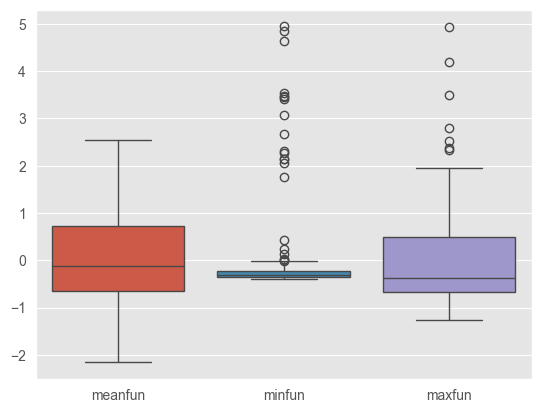

In [45]:
sns.boxplot(data=feature)

In [46]:
# Q1 = np.percentile(feature, 25, interpolation = 'midpoint')
# Q3 = np.percentile(feature, 75, interpolation = 'midpoint')
# IQR = Q3 - Q1
# IQR

In [52]:
#Outlier Detection Logic

for col in feature.columns:  #iterate over my feature columns             # This cell deal with the outliers
    mean=feature[col].mean()                                              # After scalling any value is more than 3 it considerd as outlier, I made it equal to the mean
    std=feature[col].std()
    Q1 = np.percentile(feature[col], 25, interpolation = 'midpoint')  #  Value below which 25% of the data lies.
    Q3 = np.percentile(feature[col], 75, interpolation = 'midpoint')  #  Value below which 75% of the data lies.
    IQR = Q3 - Q1  # Interquartile Range is used to detect outliers.  --> Outliers are defined as values outside the range: [Q1 - 1.5 *IQR , Q3 + 1.5 *IQR]
    print(IQR)
    for i in range(3168): # Iterating through Each Row and Replacing Outliers:
        if feature[col][i]>(Q3 + 1.5 * IQR) or feature[col][i]<(Q1 - 1.5 * IQR):

            feature[col][i]=mean # mean ensures that extreme values do not affect the model's performance.

1.364441632474913


KeyError: 178

<Axes: >

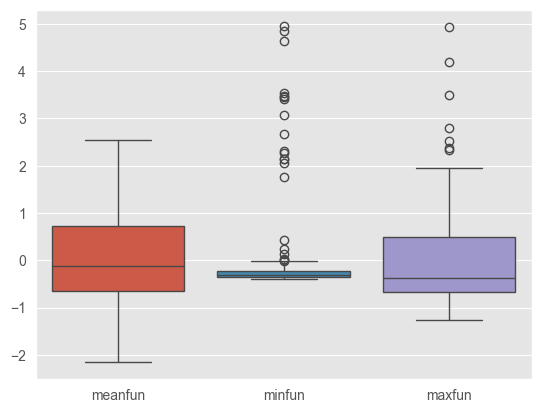

In [53]:
sns.boxplot(data=feature)

In [54]:
feature=np.array(feature)
feature

array([[-1.17460713e+00, -3.97645689e-01, -7.23128406e-01],
       [-1.97337966e-01, -3.94251711e-01, -8.02540005e-01],
       [-6.40715620e-01, -3.71302411e-01, -9.72656377e-01],
       [-4.33212811e-01, -3.50158947e-01, -3.89602394e-01],
       [-6.70757770e-02, -3.23578184e-01, -5.35248608e-01],
       [-2.77616992e-03, -3.24800467e-01, -3.35193389e-01],
       [-3.73613295e-01, -3.70533857e-01, -5.35361585e-01],
       [ 5.66595587e-02, -3.46619378e-01, -6.32217872e-02],
       [-1.66758817e-01, -3.12751875e-01, -2.95679791e-01],
       [ 5.36932105e-01, -3.61036795e-01, -2.40058408e-01],
       [-1.98423195e-01, -3.63359955e-01, -3.39290275e-01],
       [-5.26055620e-01, -3.91857081e-01, -7.40640550e-01],
       [-2.16752172e-01, -2.97683451e-01, -5.05447181e-01],
       [-6.19586463e-01, -2.90602110e-01, -7.51230735e-01],
       [ 3.60503095e-01, -3.75563663e-01, -7.64948602e-02],
       [-1.33789677e-01, -3.48367835e-01, -5.51689450e-01],
       [ 1.57584155e-01, -2.82069918e-01

In [55]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,random_state=50,train_size=0.45)

In [56]:
model = LogisticRegression (solver = 'liblinear')
model.fit (feature_train, target_train)
predictions = model.predict(feature_test)
report = classification_report (target_test, predictions)
print(report)

              precision    recall  f1-score   support

       False       0.85      0.81      0.83        27
        True       0.93      0.94      0.94        71

    accuracy                           0.91        98
   macro avg       0.89      0.88      0.88        98
weighted avg       0.91      0.91      0.91        98



C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
model=LinearSVC()
model.fit(feature_train,target_train)
train_pred=model.predict(feature_train)
y_preds=model.predict(feature_test)

print(f"Training score = {metrics.accuracy_score(target_train,train_pred)}")
print(f"Testing score = {metrics.accuracy_score(target_test,y_preds)}")

Training score = 0.9
Testing score = 0.8979591836734694


C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

Text(0, 0.5, 'accuracy')

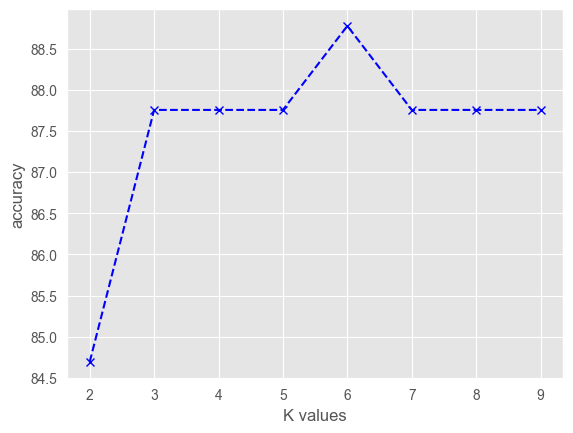

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy_vals = []
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train, target_train)
    Y_pred = knn.predict(feature_test)
    accuracy_vals.append(metrics.accuracy_score(Y_pred, target_test) * 100)
plt.plot(range(2,10) , accuracy_vals, color='blue' , marker='x', linestyle='dashed')
plt.xlabel('K values')
plt.ylabel('accuracy')

C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

Text(0, 0.5, 'Error Rate')

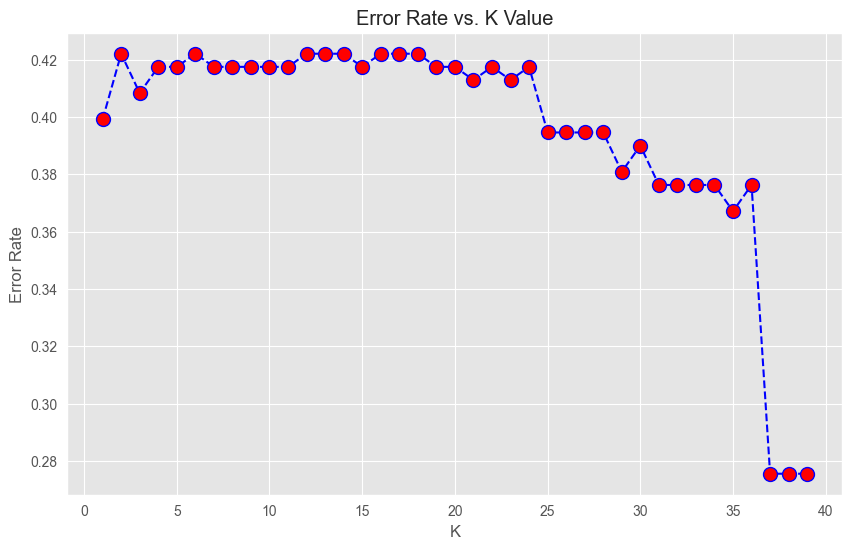

In [59]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train,target_train)
    pred_i = knn.predict(feature_test)
    error_rate.append(np.mean(pred_i != target_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [60]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(feature_train,target_train)

pred = knn.predict(feature_test)

acc  = accuracy_score(target_test,pred)
acc


C:\Users\damar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8877551020408163

In [61]:
# Save the trained model as an HDF5 file
with open('gender_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)
